In [1]:
import pandas as pd
url = 'https://worldpopulationreview.com/country-rankings/hdi-by-country'

In [2]:
df = pd.read_html(url, header = 0)
df

[                      Country  Human Development Index  2022 Population
 0                      Norway                    0.954          5511370
 1                 Switzerland                    0.946          8773637
 2                     Ireland                    0.942          5020199
 3                   Hong Kong                    0.939          7604299
 4                     Germany                    0.939         83883596
 ..                        ...                      ...              ...
 181                   Burundi                    0.423         12624840
 182               South Sudan                    0.413         11618511
 183                      Chad                    0.401         17413580
 184  Central African Republic                    0.381          5016678
 185                     Niger                    0.377         26083660
 
 [186 rows x 3 columns]]

In [3]:
df = df[0]
df

,Country,Human Development Index,2022 Population
0,Norway,0.954,5511370
1,Switzerland,0.946,8773637
2,Ireland,0.942,5020199
3,Hong Kong,0.939,7604299
4,Germany,0.939,83883596
...,...,...,...
181,Burundi,0.423,12624840
182,South Sudan,0.413,11618511
183,Chad,0.401,17413580
184,Central African Republic,0.381,5016678


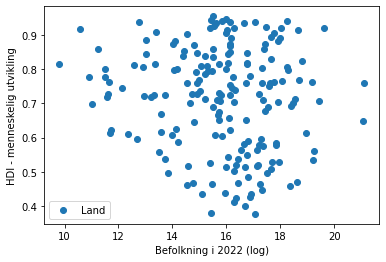

In [4]:
from matplotlib import pyplot as plt
import numpy as np

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('HDI - menneskelig utvikling')
ax.set_xlabel('Befolkning i 2022 (log)')

#plotting the function:
ax.scatter(np.log(df['2022 Population']),df['Human Development Index'],  label='Land')
ax.legend(loc='lower left',frameon=True)

In [5]:
y=df['Human Development Index']
pd.DataFrame(y)

,Human Development Index
0,0.954
1,0.946
2,0.942
3,0.939
4,0.939
...,...
181,0.423
182,0.413
183,0.401
184,0.381


In [6]:
x=pd.DataFrame(np.log(df['2022 Population']))
x['intercept']=1
x

,2022 Population,intercept
0,15.522324,1
1,15.987262,1
2,15.428980,1
3,15.844224,1
4,18.244941,1
...,...,...
181,16.351177,1
182,16.268110,1
183,16.672761,1
184,15.428279,1


In [7]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


                               OLS Regression Results                              
Dep. Variable:     Human Development Index   R-squared:                       0.014
Model:                                 OLS   Adj. R-squared:                  0.008
Method:                      Least Squares   F-statistic:                     2.571
Date:                     Fri, 01 Apr 2022   Prob (F-statistic):              0.111
Time:                             12:07:54   Log-Likelihood:                 88.343
No. Observations:                      186   AIC:                            -172.7
Df Residuals:                          184   BIC:                            -166.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [8]:
res.params

2022 Population   -0.008707
intercept          0.851538
dtype: float64

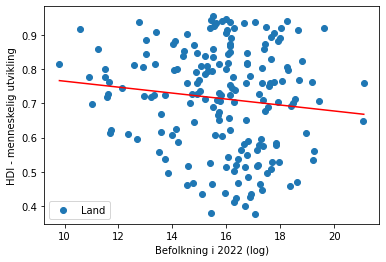

In [9]:
x=np.linspace(min(np.log(df['2022 Population'])), max(np.log(df['2022 Population'])), 100)

regression_line=res.params['intercept']+res.params['2022 Population']*x

ax.plot(x, regression_line,color='red')
fig

Lagde en regresjon mellom HDI, et mål på menneskelig utvikling, og befolkning. Regresjonen viser en svak negativ sammenheng mellom HDI og befolkning.

Brukte kode fra github repositorie for å skrape data: https://github.com/dataprofessor/code/blob/master/python/pandas_read_html_for_webscraping.ipynb 